In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensor import partial_tucker_decomp, flip_factors, find_R2X_partialtucker, OHSU_parafac2_decomp
from tensorly.metrics.regression import variance as tl_var
from Data_Mod import form_tensor, form_parafac2_tensor
from dataHelpers import importLINCSprotein, proteinNames, dataCleanUp

In [3]:
component = 5
tensor, treatment_list, times = form_tensor()
p2slices, chromosomes, IFproteins, histones, geneExpression, RNAGenes, RPPAProteins = form_parafac2_tensor()

In [5]:
atac, cycIF, GCP, L1000, RNAseq, RPPA, chromosomes, IFproteins, histones, geneExpression, RNAGenes, RPPAProteins = dataCleanUp()

<AxesSubplot:>

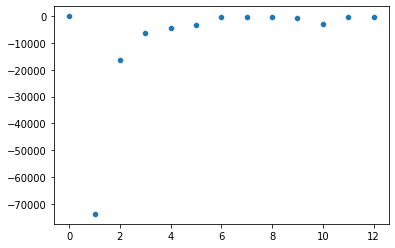

In [7]:
gR2X = np.zeros(13)
#topCount = 0
#bottomCount = 0
for i in range(1, 13):
    decomp, error = OHSU_parafac2_decomp(p2slices, i)
    geneExp = np.array(decomp[1][0][4]) #gene expression shit
    np.transpose(geneExp)
    tbc = np.array(decomp[1][2]) #treatments by component
    result = np.dot(tbc, geneExp)
    #topCount += (tl_var(result)**2 - tl_var(RNAseq)**2)
    #bottomCount += (tl_var(RNAseq)**2)
    gR2X[i] = 1.0 - tl_var(result - RNAseq) / tl_var(RNAseq)
sns.scatterplot(np.arange(len(gR2X)), gR2X)

In [8]:
tbc = np.array(decomp[1][2]) #treatments by component

In [9]:
result = np.dot(tbc, geneExp)
result

array([ 20.94631131, -26.11725542,  48.72052602,  17.50628083,
        29.5662986 , -30.06234512, -20.41482647,  40.35758964,
       -16.83070072,  -4.83213109,   3.0912439 , -47.8568459 ,
        -1.62972261, -57.72571395,  45.28129097])

In [52]:
(np.var(result-RNAseq))/(np.var(RNAseq))

295.00343677604667

In [53]:
def geneR2X(recon, og):
    return (1-((np.var(recon - og))**2)/(np.var(og))**2)

In [37]:
geneExp = np.array(decomp[1][0][4]) #gene expression shit
np.transpose(geneExp)
np.shape(geneExp)

(5,)

<AxesSubplot:>

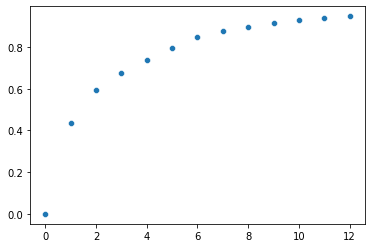

In [3]:
R2X = np.zeros(13)
for i in range(1, 13):
    output = partial_tucker_decomp(tensor, [2], i)
    R2X[i] = find_R2X_partialtucker(output, tensor)
sns.scatterplot(np.arange(len(R2X)), R2X)

In [61]:
n = 0
size = 295
#protMap.iat[n,0] == 0
#protMap.rename(columns={n : "asdf"})

In [62]:
#loop through the entire dataframe
while(n < size):
    #check individually in case average somehow magically ends up being 0
    if (boolsOfVal[0][n] == False):
        #now we want to remove that column from protMap
        protMap = protMap.drop(n, axis = 1) #use n to drop because n is tracking in both boolsOfVal and protMap
    else: #otherwise we have something significant!
        protMap = protMap.rename(columns={n : pNames[n]}) #rename the column title, which is n to the name from pNames
    n += 1


In [63]:
protMap1 = protMap.T
protMap1

,0,1,2,3,4
CDK1-R-C,0.203724,-0.016235,-0.220376,-0.092549,-0.105576
Connexin-43-R-C,-0.088199,0.083615,-0.093438,-0.165850,0.269420
Cyclin-B1-R-V,0.259433,0.029287,-0.255342,-0.089511,-0.089662
DUSP4-R-V,0.319310,-0.111086,0.111079,0.127807,0.030305
EMA-M-C,-0.102297,0.086264,-0.243442,0.285912,0.235589
Hif-1-alpha-M-C,0.040702,0.025899,-0.084100,0.005300,0.302627
IRF-1-R-C,-0.005827,0.120349,-0.084392,0.475302,0.006963
Myosin-IIa_pS1943-R-V,0.100447,0.421224,0.147598,-0.044956,-0.005940
NDRG1_pT346-R-V,-0.013388,0.078085,-0.043202,-0.227692,0.376933
PAI-1-M-V,0.126122,-0.011323,0.405196,-0.133951,0.093790


<AxesSubplot:>

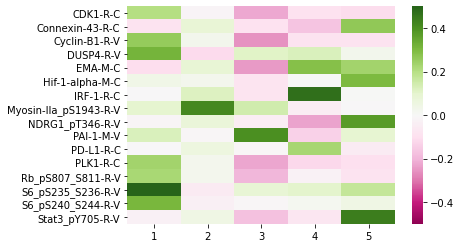

In [64]:
sns.heatmap(protMap1, cmap = 'PiYG', vmin = -0.5, vmax = 0.5, xticklabels = protMap.index + 1)